In [4]:
import pandas as pd

### Задание 1:
a. Откройте файл Product_Sales.csv и выведите первые 10 строк.
b. Посмотрите на данные и скажите, что они из себя представляют.
c. Cколько в таблице строк и полей? 
d. Какие типы данных есть в датасете? 
e. Есть ли пустые значения?

In [ ]:
# invoice_num: Номер счета
# customer_id: ID клиента
# gender: Пол клиента
# age: Возраст клиента
# category: Категория товара
# quantity: Количество проданных товаров в рамках одного счета
# selling_price_per_unit: Стоимость продажи 1 ед.товара
# cost_price_per_unit: Себестоимость 1 ед.товара
# region: Регион
# state: Штат
# shopping_mall: Магазин

b. Данные файла Product_Sales.csv содержат информацию о продажах товаров, 
   с указанием гендерных групп покупателей  и разделением по географическому расположению сбыта 
   Вывод пустых значений выполнил поколоночно.

In [76]:
#a. Открытие файла Product_Sales.csv
product_sales_df = pd.read_csv('Product_Sales.csv')

# вывод первых 10 строк из датафрейма Product_Sales.csv
display(product_sales_df.tail(10))

#b. Общее количество строк и полей
total_rows = product_sales_df.shape[0]
total_columns = product_sales_df.shape[1]

#d. Типы данных
column_data_types = product_sales_df.dtypes

#e. Пустые значения
null_values = product_sales_df.isnull().sum()


print(f"Общее количество строк: {total_rows}")
print(f"Общее количество полей: {total_columns}")
print("\nТипы данных в датасете:")
print(column_data_types)
print("\nКоличество пустых значений в датасете:")
print(null_values)

,invoice_num,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,region,state,shopping_mall
99939,I301404,10/30/2016 11:44,C232103,Male,40.0,Clothing,3,900.24,675.18,Central,Illinois,Istinye Park
99940,I100487,10/30/2016 11:45,C213360,Female,22.0,Cosmetics,4,162.64,130.11,Central,Illinois,Kanyon
99941,I206026,10/30/2016 11:45,C225105,Female,27.0,Books,1,15.15,10.60,West,Washington,Viaport Outlet
99942,I332620,10/30/2016 11:45,C158124,Female,68.0,Cosmetics,2,81.32,56.92,West,Washington,Zorlu Center
99943,I434161,10/30/2016 11:45,C246484,Female,48.0,Clothing,2,600.16,450.12,West,Washington,Metropol AVM
99944,I166306,10/30/2016 11:45,C197019,Female,56.0,Clothing,3,900.24,675.18,West,Arizona,Viaport Outlet
99945,I207389,10/30/2016 11:46,C947114,Male,25.0,Clothing,3,900.24,675.18,West,Arizona,Kanyon
99946,I237018,10/30/2016 11:46,C115431,Male,30.0,Food & Beverage,4,20.92,15.69,West,Arizona,Zorlu Center
99947,I246114,10/30/2016 11:46,C266394,Female,49.0,Toys,5,179.20,143.36,West,Arizona,Metropol AVM
99948,I216889,10/30/2016 11:46,C122371,Male,57.0,Clothing,2,600.16,450.12,West,Arizona,Zorlu Center


Общее количество строк: 99949
Общее количество полей: 12

Типы данных в датасете:
invoice_num                object
invoice_date               object
customer_id                object
gender                     object
age                       float64
category                   object
quantity                    int64
selling_price_per_unit    float64
cost_price_per_unit       float64
region                     object
state                      object
shopping_mall              object
dtype: object

Количество пустых значений в датасете:
invoice_num               0
invoice_date              0
customer_id               0
gender                    6
age                       6
category                  0
quantity                  0
selling_price_per_unit    0
cost_price_per_unit       0
region                    0
state                     0
shopping_mall             0
dtype: int64


b. Похожие результаты выводит функция info ()

In [75]:
#b.Информация о дата-сете
product_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99949 entries, 0 to 99948
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   invoice_num             99949 non-null  object  
 1   invoice_date            99949 non-null  object  
 2   customer_id             99949 non-null  object  
 3   gender                  99943 non-null  object  
 4   age                     99943 non-null  float64 
 5   category                99949 non-null  object  
 6   quantity                99949 non-null  int64   
 7   selling_price_per_unit  99949 non-null  float64 
 8   cost_price_per_unit     99949 non-null  float64 
 9   region                  99949 non-null  object  
 10  state                   99949 non-null  object  
 11  shopping_mall           99949 non-null  object  
 12  age_group               99943 non-null  category
dtypes: category(1), float64(3), int64(1), object(8)
memory usage: 9.2+ MB


### Задание 2: 
Выведите список уникальных магазинов

In [51]:
# Получения списка уникальных магазинов

unique_shopping_malls = product_sales_df['shopping_mall'].unique()
print(unique_shopping_malls)

['Kanyon' 'Viaport Outlet' 'Metrocity' 'Metropol AVM' 'Istinye Park'
 'Mall of Istanbul' 'Zorlu Center']


### Задание 3:
Посчитайте количество проданных товаров в разбивке по категориям. Выведите топ-3 наиболее продаваемых категорий товаров

In [52]:
# Подсчет количества проданных товаров по категориям
sales_by_category = product_sales_df.groupby('category')['quantity'].sum()

# Сортировка категорий по количеству проданных товаров в убывающем порядке и получение топ-3
top_3_categories = sales_by_category.sort_values(ascending=False).head(3)

# Вывод результатов
print(top_3_categories)

category
Clothing           104110
Cosmetics           45802
Food & Beverage     44512
Name: quantity, dtype: int64


### Задание 4:
Посчитайте сумму продаж по штатам. Какой штат продает больше всего, а какой - меньше?

In [53]:
# Подсчет суммы продаж по штатам
sales_by_state = product_sales_df.groupby('state')['selling_price_per_unit'].sum()

# Нахождение штата с максимальной суммой продаж
state_max_sales = sales_by_state.idxmax()
max_sales = sales_by_state.max()

# Нахождение штата с минимальной суммой продаж
state_min_sales = sales_by_state.idxmin()
min_sales = sales_by_state.min()

# Вывод результатов
print(f"Штат с максимальной суммой продаж: {state_max_sales} ({max_sales:.2f})")
print(f"Штат с минимальной суммой продаж: {state_min_sales} ({min_sales:.2f})")

Штат с максимальной суммой продаж: California (13097040.15)
Штат с минимальной суммой продаж: Indiana (939183.52)


### Задание 5:
Разбейте покупателей на возрастные группы. Группы определите самостоятельно. Какая из этих групп тратит больше всего денег на одежду?

##### Вариант 1 

Один из вариантов разбить возрастные группы по этапам жизненного цикла человека. Для определения возрастных групп использовал десятилетия

In [77]:
# Определение возрастных групп
bins = [0, 18, 30, 40, 50, 60, 70, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-100']
# делим покупателей на заданные возрастные группы с помощью функции pd.cut()
product_sales_df['age_group'] = pd.cut(product_sales_df['age'], bins=bins, labels=labels, right=False)

# Фильтрация данных по категории 'Clothing' и подсчет суммы продаж по возрастным группам
clothing_sales_by_age_group = product_sales_df[product_sales_df['category'] == 'Clothing'].groupby('age_group')['selling_price_per_unit'].sum()

# Нахождение возрастной группы с максимальной суммой продаж одежды
max_clothing_sales_age_group = clothing_sales_by_age_group.idxmax()
max_clothing_sales = clothing_sales_by_age_group.max()

print(f"Возрастная группа, тратящая больше всего денег на одежду: {max_clothing_sales_age_group}, с суммой продаж: {max_clothing_sales}")

Возрастная группа, тратящая больше всего денег на одежду: 19-30, с суммой продаж: 7261635.92


##### Вариант 2

Второй вариант, адаптировать границы группы под наши данные, с использованием гистограммы, я сделал это с использованием библиотеки matplotlib
Далее разделил всех покупателей на возрастные группы в соответствии с гистограммой и подсчитал сумму продаж товаров категории одежда, группируя по полученным групами. Группу 0-18 я исключил по причине нулевых трат  

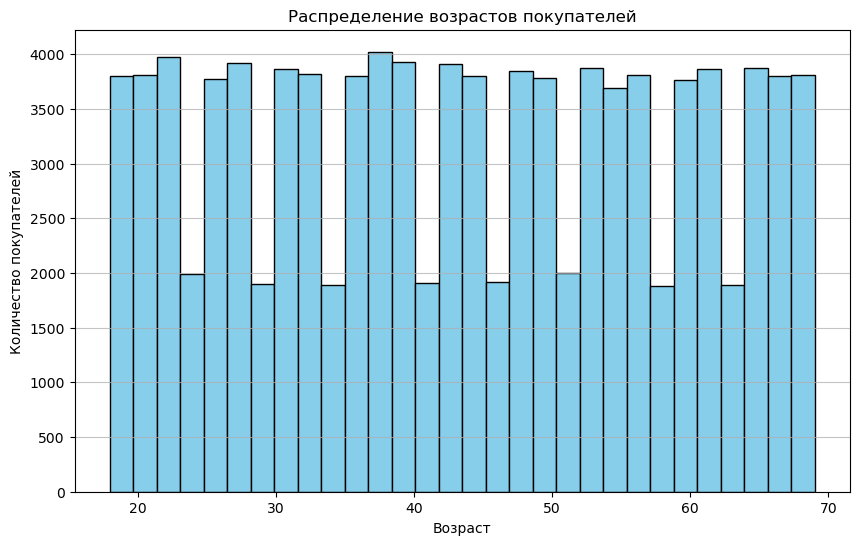

In [72]:
  import matplotlib.pyplot as plt

# Построение гистограммы распределения возрастов
plt.figure(figsize=(10, 6))
plt.hist(data['age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение возрастов покупателей')
plt.xlabel('Возраст')
plt.ylabel('Количество покупателей')
plt.grid(axis='y', alpha=0.75)
plt.show()

В результате рассчитал и отобразил возрастную группу, которая тратит больше всего денег на товары категории одежда

In [71]:
# Определение возрастных групп
bins2 = [18, 30, 45, 60, 100]
labels2 = ['18-30', '31-45', '46-60', '61-100']
# делим покупателей на заданные возрастные группы с помощью функции pd.cut()
product_sales_df['age_group'] = pd.cut(product_sales_df['age'], bins=bins2, labels=labels2, right=False)

# Фильтрация данных по категории 'Clothing' и подсчет суммы продаж по возрастным группам
clothing_sales_by_age_group2 = product_sales_df[product_sales_df['category'] == 'Clothing'].groupby('age_group')['selling_price_per_unit'].sum()

# Нахождение возрастной группы с максимальной суммой продаж одежды
max_clothing_sales_age_group2 = clothing_sales_by_age_group2.idxmax()
max_clothing_sales2 = clothing_sales_by_age_group2.max()

print(f"Возрастная группа, тратящая больше всего денег на одежду: {max_clothing_sales_age_group2}, с суммой продаж: {max_clothing_sales2}")

Возрастная группа, тратящая больше всего денег на одежду: 46-60, с суммой продаж: 9001499.76


### Задание 6:
Какая доля всех покупок оплачивалась наличными? Используйте файл Product_Payment.csv, чтобы подтянуть метод оплаты

In [61]:
# Загрузка файла Product_Payment.csv
product_payment_df = pd.read_csv('Product_Payment.csv')

# Объединение данных о продажах с данными о способе оплаты по номеру счета
merged_df = product_sales_df.merge(product_payment_df, on='invoice_num')

# Подсчет количества покупок, оплаченных наличными
cash_payments_count = merged_df[merged_df['payment_method'] == 'Cash']['quantity'].sum()

# Подсчет общего количества покупок
total_purchases_count = merged_df['quantity'].sum()

# Расчет доли покупок, оплаченных наличными
cash_payment_share = cash_payments_count / total_purchases_count

# Вывод результата
print(f"Доля покупок, оплаченных наличными: {cash_payment_share:.2%}")

Доля покупок, оплаченных наличными: 44.64%
